## Import modules

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [46]:
!pip install pystan==2.19 
!pip install fbprophet
# install visual c++ - visual studio
# if you face errors - use conda install

## Loading the dataset

In [47]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [48]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


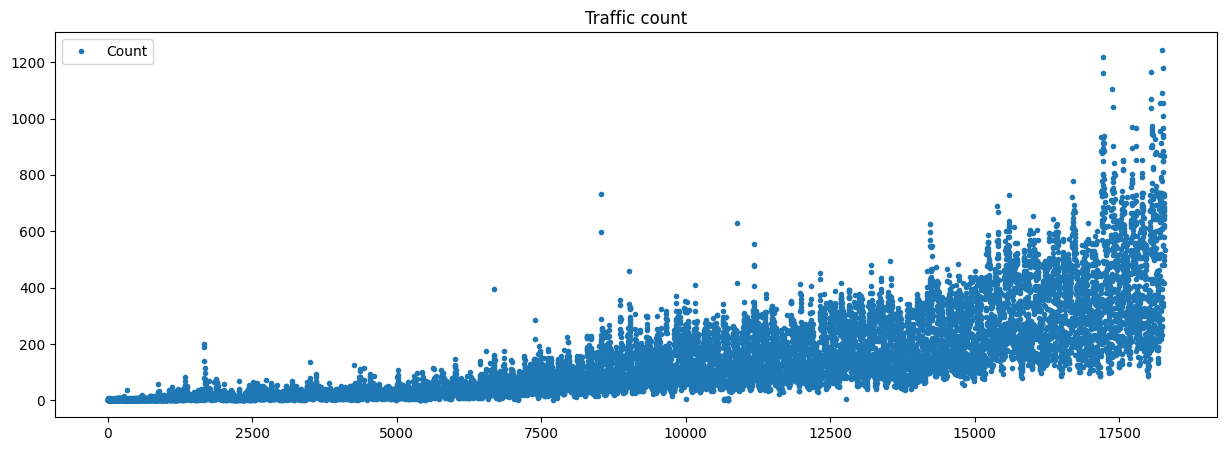

In [49]:
df.drop(df.columns[[0]], axis=1, inplace=False).plot(style='.', figsize=(15,5), title='Traffic count')
plt.show()

## Preprocessing the dataset

In [50]:
# check null values
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [52]:
# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


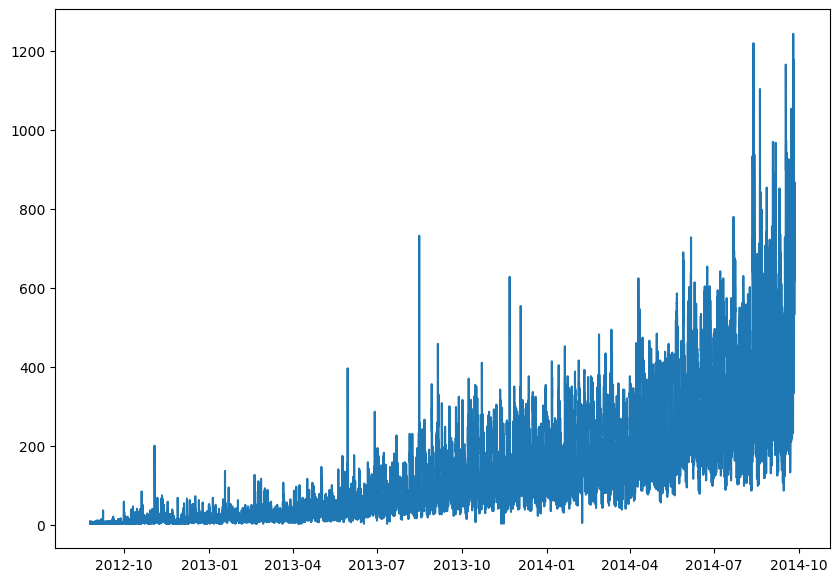

In [53]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

<Figure size 1000x700 with 0 Axes>

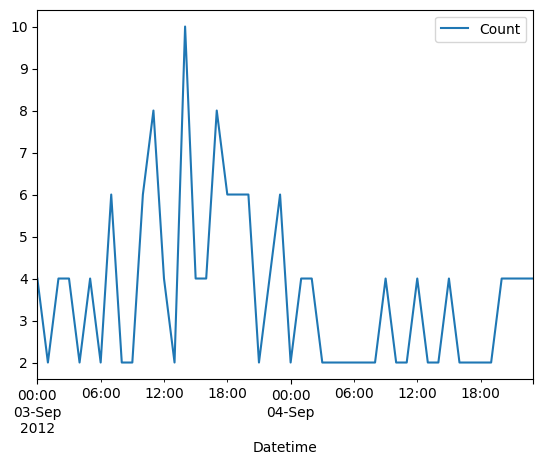

In [54]:
# EDA
plt.figure(figsize=(10,7))
df.iloc[216:264].plot(x='Datetime', y='Count')
plt.show()

## Format data for the model

In [55]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
#df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [56]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25 00:00:00,8,2012-08-25 00:00:00
2012-08-25 01:00:00,2,2012-08-25 01:00:00
2012-08-25 02:00:00,6,2012-08-25 02:00:00
2012-08-25 03:00:00,2,2012-08-25 03:00:00
2012-08-25 04:00:00,2,2012-08-25 04:00:00


## Input Split

In [57]:
!pip install scikit-learn

In [58]:
#import scikit-learn as sklearn
size = 2400
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [59]:
train.tail()

,y,ds
Datetime,,
2014-06-17 19:00:00,458,2014-06-17 19:00:00
2014-06-17 20:00:00,422,2014-06-17 20:00:00
2014-06-17 21:00:00,432,2014-06-17 21:00:00
2014-06-17 22:00:00,408,2014-06-17 22:00:00
2014-06-17 23:00:00,438,2014-06-17 23:00:00


In [60]:
test.head()

,y,ds
Datetime,,
2014-06-18 00:00:00,394,2014-06-18 00:00:00
2014-06-18 01:00:00,274,2014-06-18 01:00:00
2014-06-18 02:00:00,230,2014-06-18 02:00:00
2014-06-18 03:00:00,204,2014-06-18 03:00:00
2014-06-18 04:00:00,220,2014-06-18 04:00:00


In [61]:
test.tail()

,y,ds
Datetime,,
2014-09-25 19:00:00,868,2014-09-25 19:00:00
2014-09-25 20:00:00,732,2014-09-25 20:00:00
2014-09-25 21:00:00,702,2014-09-25 21:00:00
2014-09-25 22:00:00,580,2014-09-25 22:00:00
2014-09-25 23:00:00,534,2014-09-25 23:00:00


## Model Training

In [62]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

Initial log joint probability = -311.397


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         34926     0.0132859        550.81           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       34933.6   0.000488418       133.602      0.1746           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       34935.5    0.00158651       133.994      0.3903           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       34936.7     0.0037395       364.983      0.3605           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     490       34937.4   3.80417e-05       144.002   5.295e-07       0.001      659  LS failed, Hessian reset 
     499       34937.4   4.56961e-05       52.1783      0.6346      0.6346      6

In [63]:
future = model.make_future_dataframe(periods=2400 ,freq='h')
future

,ds
0,2012-08-25 00:00:00
1,2012-08-25 01:00:00
2,2012-08-25 02:00:00
3,2012-08-25 03:00:00
4,2012-08-25 04:00:00
...,...
18283,2014-09-25 19:00:00
18284,2014-09-25 20:00:00
18285,2014-09-25 21:00:00
18286,2014-09-25 22:00:00


In [64]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,-30.173607,-59.132747,62.860959,-30.173607,-30.173607,33.835487,33.835487,33.835487,6.236570,...,-5.484491,-5.484491,-5.484491,33.083409,33.083409,33.083409,0.0,0.0,0.0,3.661881
1,2012-08-25 01:00:00,-30.156110,-75.210611,49.646250,-30.156110,-30.156110,16.158426,16.158426,16.158426,-9.806522,...,-7.107145,-7.107145,-7.107145,33.072094,33.072094,33.072094,0.0,0.0,0.0,-13.997684
2,2012-08-25 02:00:00,-30.138614,-96.181521,29.688936,-30.138614,-30.138614,-1.846996,-1.846996,-1.846996,-26.097013,...,-8.810675,-8.810675,-8.810675,33.060692,33.060692,33.060692,0.0,0.0,0.0,-31.985610
3,2012-08-25 03:00:00,-30.121117,-111.590627,15.583958,-30.121117,-30.121117,-16.961210,-16.961210,-16.961210,-39.420089,...,-10.590326,-10.590326,-10.590326,33.049205,33.049205,33.049205,0.0,0.0,0.0,-47.082327
4,2012-08-25 04:00:00,-30.103621,-118.361229,9.159045,-30.103621,-30.103621,-28.074702,-28.074702,-28.074702,-48.672074,...,-12.440260,-12.440260,-12.440260,33.037633,33.037633,33.037633,0.0,0.0,0.0,-58.178322


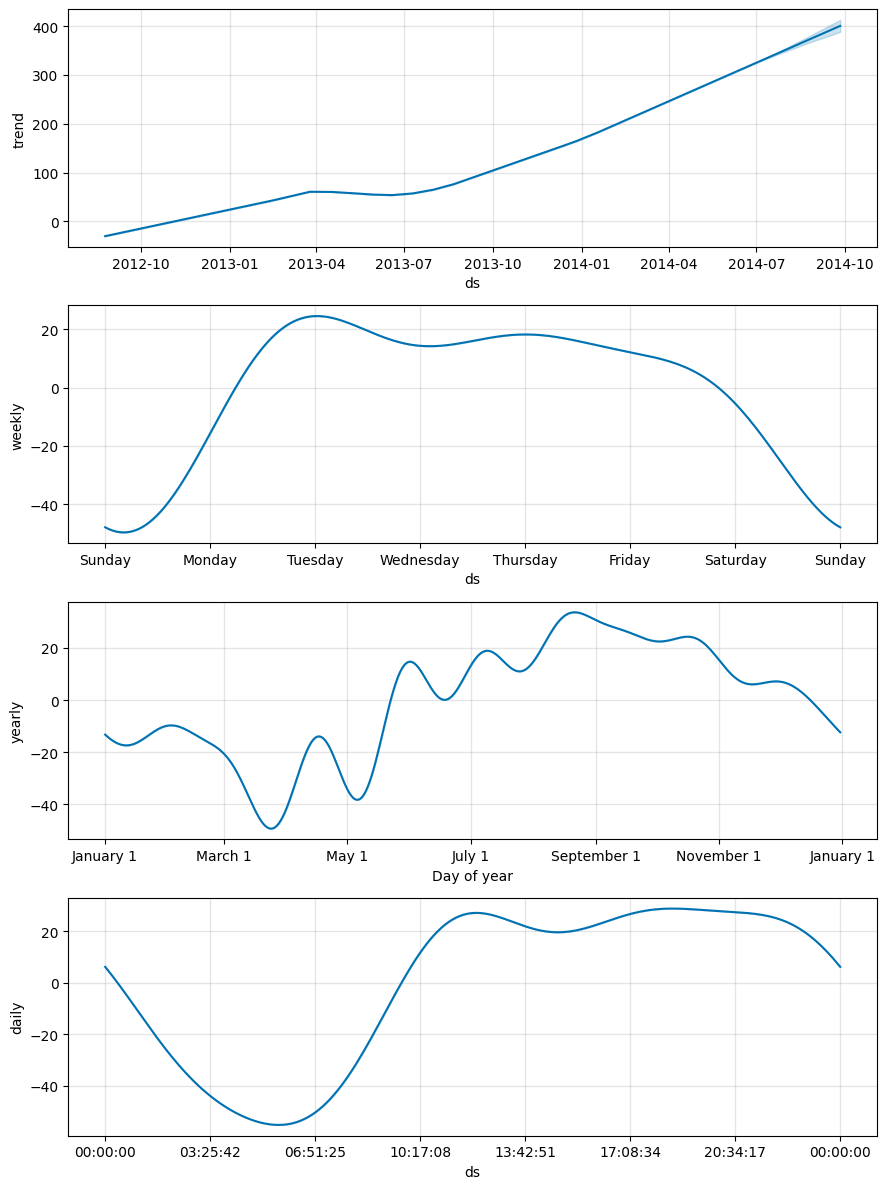

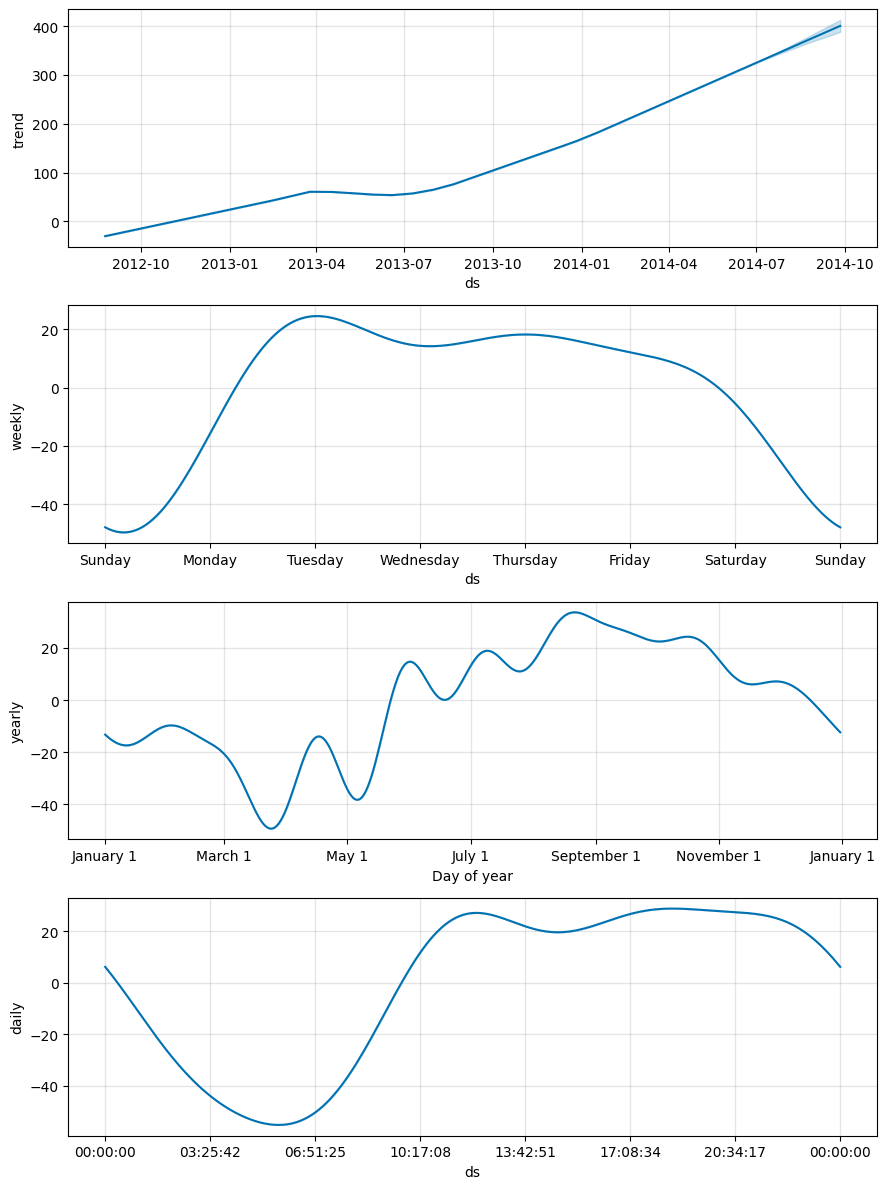

In [65]:
model.plot_components(forecast)

In [66]:
pred = forecast.iloc[-2400:, :]
len(pred)

2400

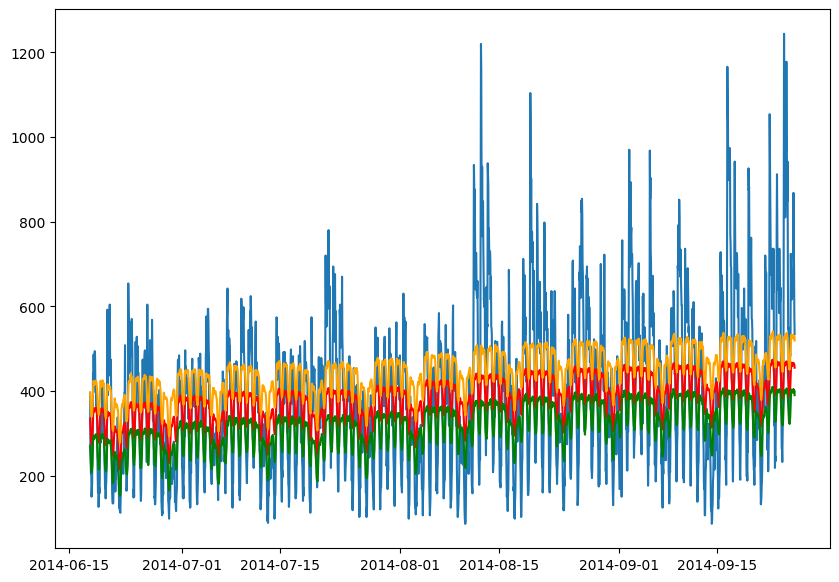

In [67]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

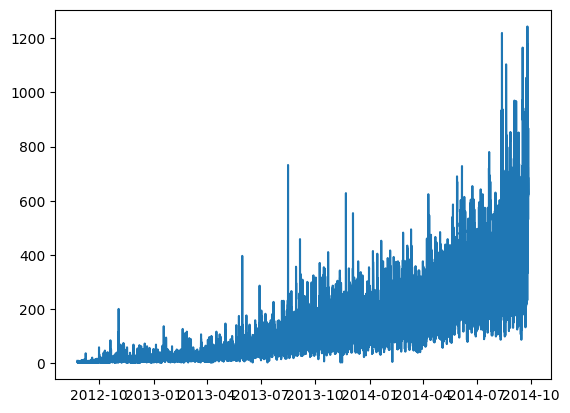

In [68]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

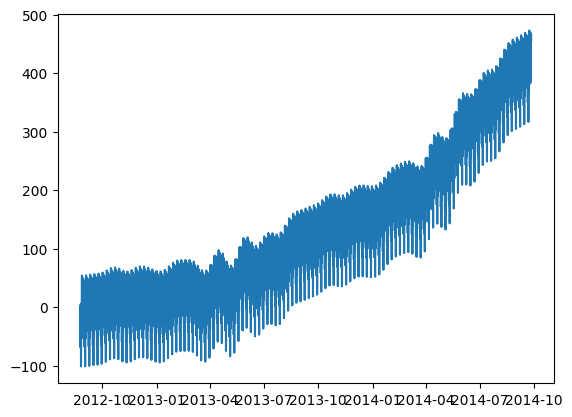

In [69]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [70]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=1000, freq='h')
forecast = model.predict(future)
forecast.head()

Initial log joint probability = -165.451
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       43822.6    0.00871396       1594.37           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       43840.3    0.00332981       216.053           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         43845    0.00161978       377.115           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       43846.5   8.41974e-05       170.251      0.1329      0.5909      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       43847.2    0.00345359       690.378      0.1653           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,15.273519,-82.624338,90.615707,15.273519,15.273519,-9.603411,-9.603411,-9.603411,5.315729,...,-6.796933,-6.796933,-6.796933,-8.122208,-8.122208,-8.122208,0.0,0.0,0.0,5.670108
1,2012-08-25 01:00:00,15.264491,-103.313344,63.502033,15.264491,15.264491,-34.115019,-34.115019,-34.115019,-17.130117,...,-8.839952,-8.839952,-8.839952,-8.144950,-8.144950,-8.144950,0.0,0.0,0.0,-18.850528
2,2012-08-25 02:00:00,15.255463,-127.224258,41.629985,15.255463,15.255463,-58.891235,-58.891235,-58.891235,-39.722617,...,-11.000624,-11.000624,-11.000624,-8.167993,-8.167993,-8.167993,0.0,0.0,0.0,-43.635772
3,2012-08-25 03:00:00,15.246436,-147.126498,26.069131,15.246436,15.246436,-78.713944,-78.713944,-78.713944,-57.251143,...,-13.271466,-13.271466,-13.271466,-8.191336,-8.191336,-8.191336,0.0,0.0,0.0,-63.467509
4,2012-08-25 04:00:00,15.237408,-163.862226,12.316979,15.237408,15.237408,-92.212141,-92.212141,-92.212141,-68.353684,...,-15.643482,-15.643482,-15.643482,-8.214975,-8.214975,-8.214975,0.0,0.0,0.0,-76.974733


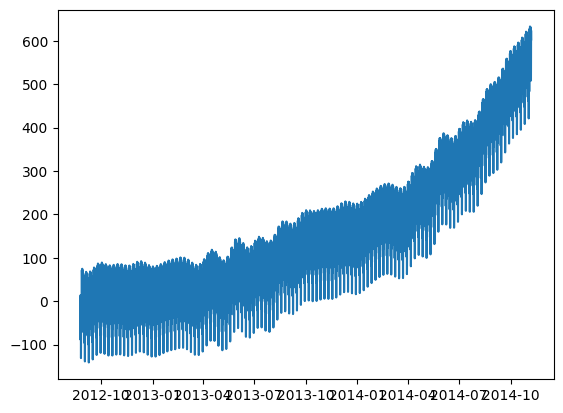

In [71]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,15.273519,-82.624338,90.615707,15.273519,15.273519,-9.603411,-9.603411,-9.603411,5.315729,...,-6.796933,-6.796933,-6.796933,-8.122208,-8.122208,-8.122208,0.0,0.0,0.0,5.670108
1,2012-08-25 01:00:00,15.264491,-103.313344,63.502033,15.264491,15.264491,-34.115019,-34.115019,-34.115019,-17.130117,...,-8.839952,-8.839952,-8.839952,-8.144950,-8.144950,-8.144950,0.0,0.0,0.0,-18.850528
2,2012-08-25 02:00:00,15.255463,-127.224258,41.629985,15.255463,15.255463,-58.891235,-58.891235,-58.891235,-39.722617,...,-11.000624,-11.000624,-11.000624,-8.167993,-8.167993,-8.167993,0.0,0.0,0.0,-43.635772
3,2012-08-25 03:00:00,15.246436,-147.126498,26.069131,15.246436,15.246436,-78.713944,-78.713944,-78.713944,-57.251143,...,-13.271466,-13.271466,-13.271466,-8.191336,-8.191336,-8.191336,0.0,0.0,0.0,-63.467509
4,2012-08-25 04:00:00,15.237408,-163.862226,12.316979,15.237408,15.237408,-92.212141,-92.212141,-92.212141,-68.353684,...,-15.643482,-15.643482,-15.643482,-8.214975,-8.214975,-8.214975,0.0,0.0,0.0,-76.974733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19283,2014-11-06 11:00:00,555.135417,536.060008,704.613509,548.850411,560.193431,63.607750,63.607750,63.607750,38.285298,...,15.601693,15.601693,15.601693,9.720759,9.720759,9.720759,0.0,0.0,0.0,618.743167
19284,2014-11-06 12:00:00,555.203338,532.481141,708.212567,548.912825,560.271506,68.635278,68.635278,68.635278,43.892175,...,15.033144,15.033144,15.033144,9.709959,9.709959,9.709959,0.0,0.0,0.0,623.838616
19285,2014-11-06 13:00:00,555.271260,531.450753,705.049454,548.979598,560.349580,61.177687,61.177687,61.177687,36.989395,...,14.489222,14.489222,14.489222,9.699070,9.699070,9.699070,0.0,0.0,0.0,616.448946
19286,2014-11-06 14:00:00,555.339181,517.943478,695.257678,549.041389,560.427654,51.349051,51.349051,51.349051,27.686953,...,13.974004,13.974004,13.974004,9.688094,9.688094,9.688094,0.0,0.0,0.0,606.688232


## New

In [73]:
df

,y,ds
Datetime,,
2012-08-25 00:00:00,8,2012-08-25 00:00:00
2012-08-25 01:00:00,2,2012-08-25 01:00:00
2012-08-25 02:00:00,6,2012-08-25 02:00:00
2012-08-25 03:00:00,2,2012-08-25 03:00:00
2012-08-25 04:00:00,2,2012-08-25 04:00:00
...,...,...
2014-09-25 19:00:00,868,2014-09-25 19:00:00
2014-09-25 20:00:00,732,2014-09-25 20:00:00
2014-09-25 21:00:00,702,2014-09-25 21:00:00


In [74]:
split_date = '18-Aug-2014'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [75]:
df_train.tail()

,y,ds
Datetime,,
2014-08-17 20:00:00,378,2014-08-17 20:00:00
2014-08-17 21:00:00,374,2014-08-17 21:00:00
2014-08-17 22:00:00,342,2014-08-17 22:00:00
2014-08-17 23:00:00,304,2014-08-17 23:00:00
2014-08-18 00:00:00,314,2014-08-18 00:00:00


In [76]:
df_test.head()

,y,ds
Datetime,,
2014-08-18 01:00:00,230,2014-08-18 01:00:00
2014-08-18 02:00:00,200,2014-08-18 02:00:00
2014-08-18 03:00:00,134,2014-08-18 03:00:00
2014-08-18 04:00:00,102,2014-08-18 04:00:00
2014-08-18 05:00:00,128,2014-08-18 05:00:00


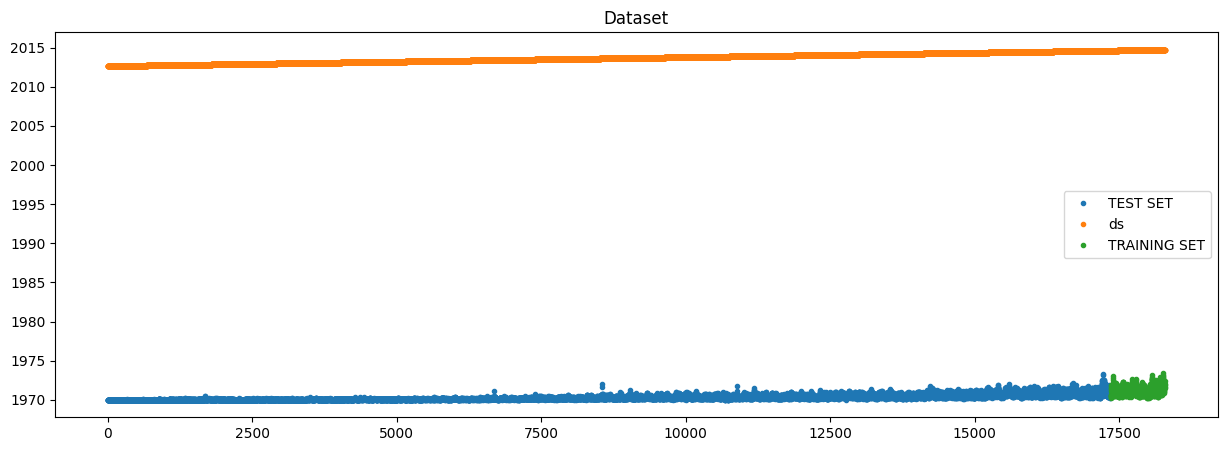

In [77]:
# Plot train and test so you can see where we have split
df_train \
    .rename(columns={'y': 'TEST SET'}) \
    .merge(df_test.rename(columns={'y': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Dataset', style='.')

plt.show()

In [78]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df_train.reset_index())

Initial log joint probability = -49.6046
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       44062.6   0.000778713       468.121           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       44066.6    0.00113908       760.845      0.6452      0.6452      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       44068.6    0.00365208       213.813           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       44069.6   2.89877e-05       286.892   4.873e-08       0.001      461  LS failed, Hessian reset 
     399       44070.3    0.00113586       360.727           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     453       44070.8   1.03513e-05    

33  LS failed, Hessian reset 
     499         44071   0.000106385       82.2694           1           1      688   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     534       44071.1   1.02594e-05       100.481    4.66e-08       0.001      787  LS failed, Hessian reset 
     599       44071.3   8.80724e-05       126.992           1           1      860   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     651       44071.5   4.93427e-05       170.819   3.502e-07       0.001      971  LS failed, Hessian reset 
     699       44071.8   0.000300713       111.362           1           1     1031   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     746       44071.8   6.38669e-07       67.2111      0.2849      0.2849     1090   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [79]:
df_test_fcst = model.predict(df=df_test.reset_index())

In [80]:
df_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-08-18 01:00:00,379.023603,296.651452,447.806515,379.023603,379.023603,-8.568012,-8.568012,-8.568012,-13.533227,...,-12.927039,-12.927039,-12.927039,17.892254,17.892254,17.892254,0.0,0.0,0.0,370.455590
1,2014-08-18 02:00:00,379.069728,284.152693,428.851259,379.069728,379.069728,-24.828507,-24.828507,-24.828507,-33.029490,...,-9.735640,-9.735640,-9.735640,17.936622,17.936622,17.936622,0.0,0.0,0.0,354.241221
2,2014-08-18 03:00:00,379.115854,265.226501,413.655147,379.115854,379.115854,-37.232637,-37.232637,-37.232637,-48.629963,...,-6.583343,-6.583343,-6.583343,17.980669,17.980669,17.980669,0.0,0.0,0.0,341.883217
3,2014-08-18 04:00:00,379.161980,261.830132,408.425875,379.161980,379.161980,-44.503404,-44.503404,-44.503404,-59.039028,...,-3.488770,-3.488770,-3.488770,18.024395,18.024395,18.024395,0.0,0.0,0.0,334.658576
4,2014-08-18 05:00:00,379.208105,261.551210,408.363132,379.208105,379.208105,-47.200355,-47.200355,-47.200355,-64.798417,...,-0.469736,-0.469736,-0.469736,18.067798,18.067798,18.067798,0.0,0.0,0.0,332.007751


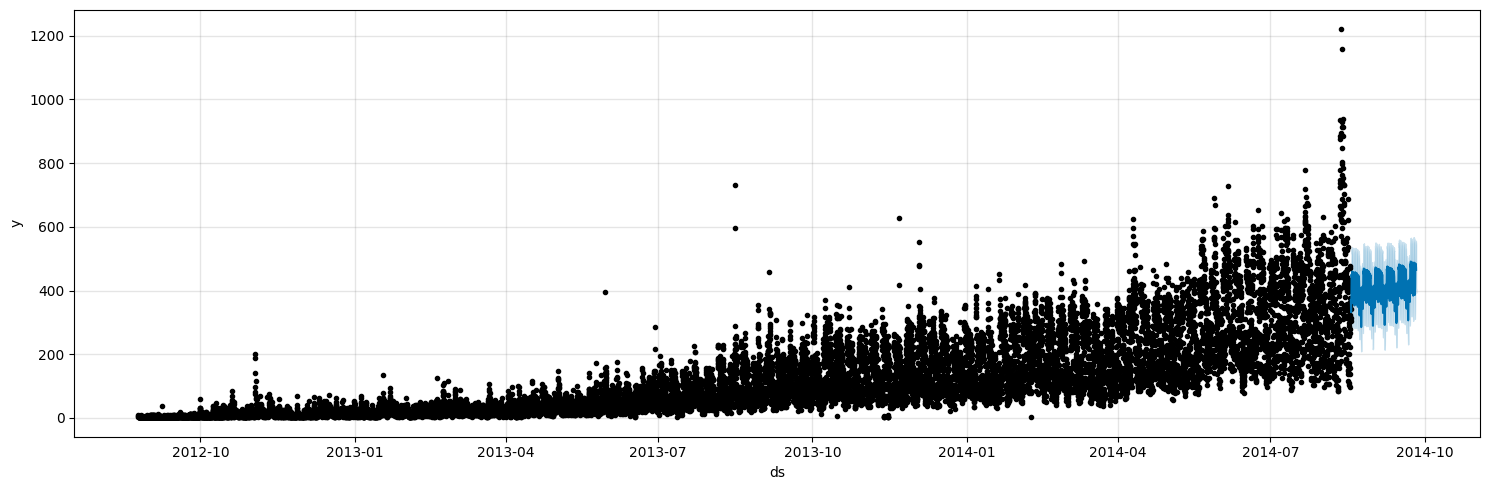

In [81]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(df_test_fcst,ax=ax)
plt.show()

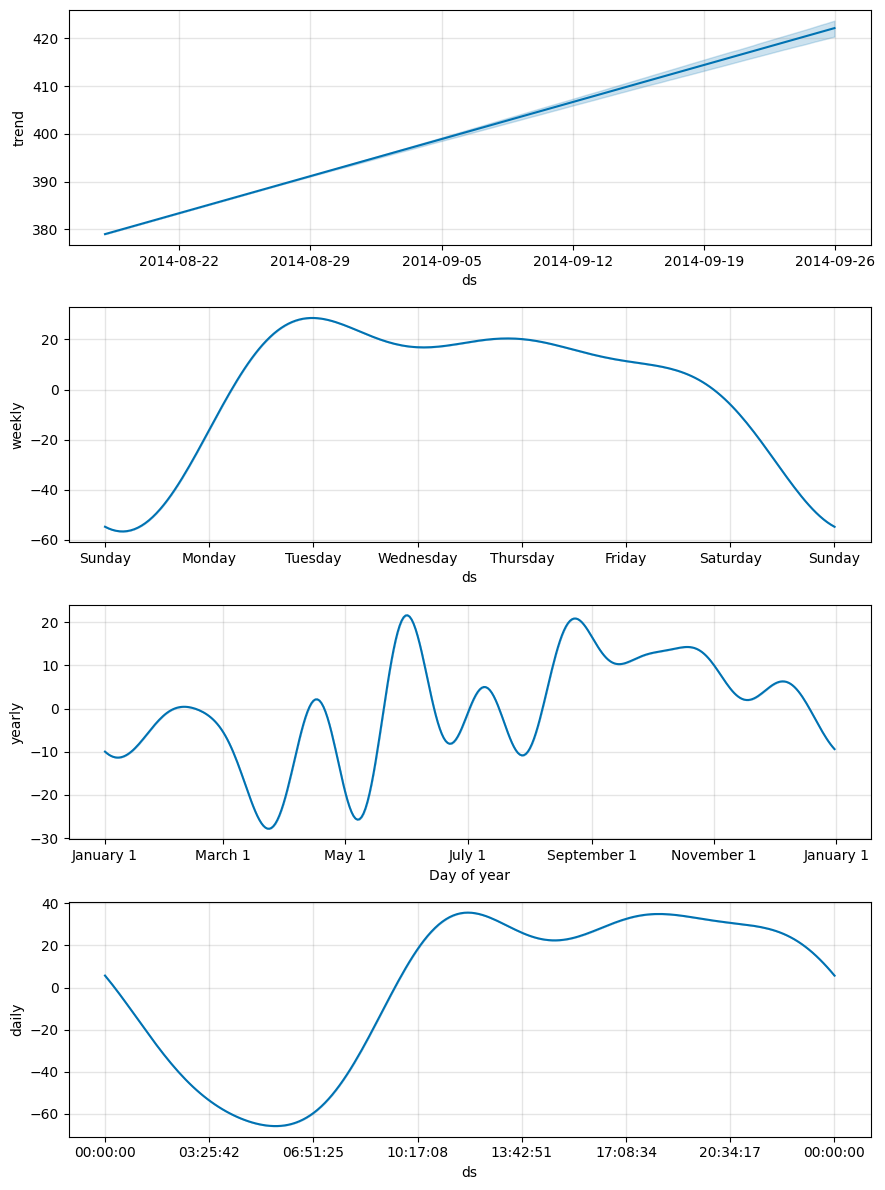

In [82]:
fig = model.plot_components(df_test_fcst)

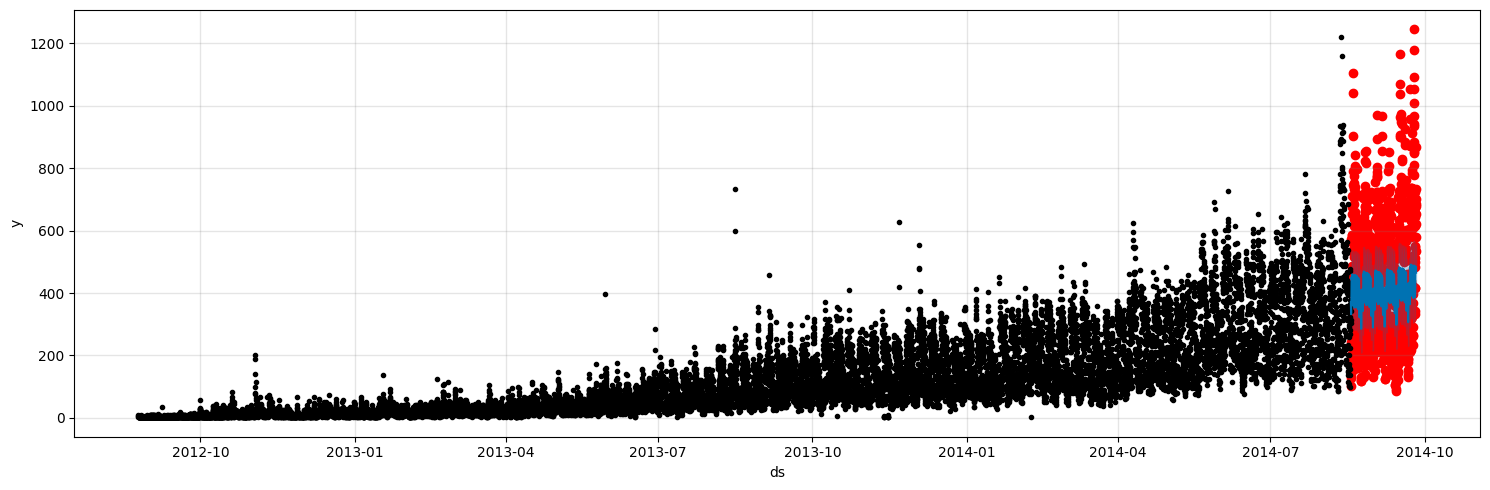

In [83]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.index, df_test['y'], color='r')
fig = model.plot(df_test_fcst, ax=ax)

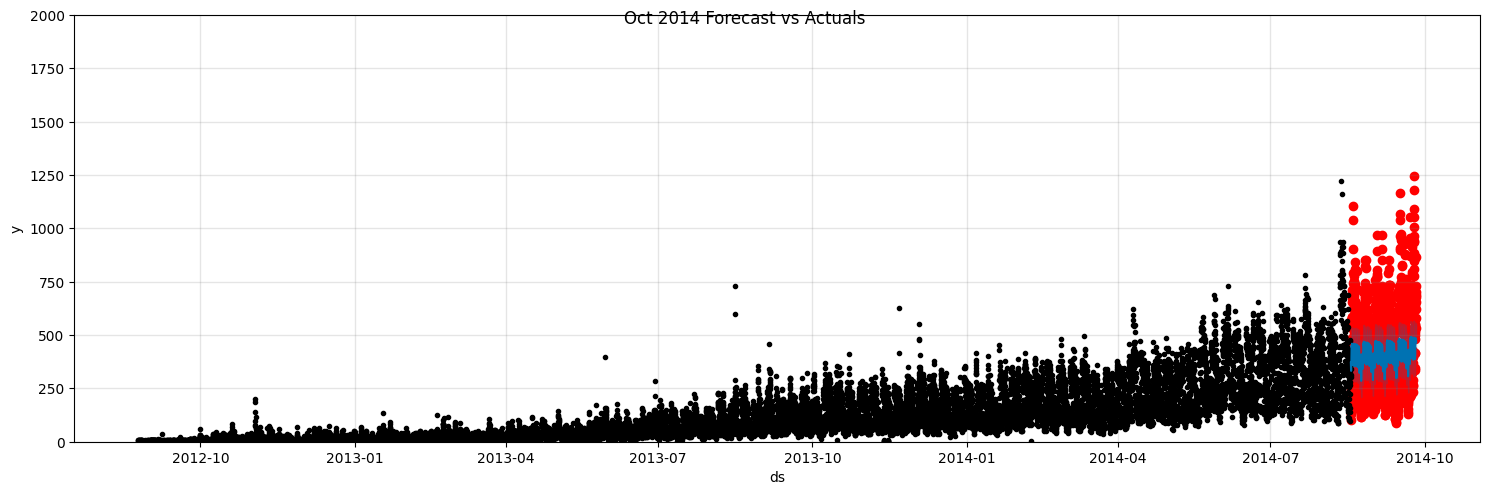

In [84]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.index, df_test['y'], color='r')
fig = model.plot(df_test_fcst, ax=ax)
#ax.set_xbound(lower='2014-08-26',upper='2014-09-26')
ax.set_ylim(0, 2000)
plot = plt.suptitle('Oct 2014 Forecast vs Actuals')

## Error Metrics

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [86]:
mean_squared_error(y_true=df_test['y'],y_pred=df_test_fcst['yhat'])

31089.447568203206

In [87]:
mean_absolute_error(y_true=df_test['y'],y_pred=df_test_fcst['yhat'])

139.0642884776409

In [88]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)*100 / y_true))

mean_absolute_percentage_error(y_true=df_test['y'],y_pred=df_test_fcst['yhat'])

3.7182377518938035

In [89]:
future = model.make_future_dataframe(periods=24000 ,freq='h')
future

,ds
0,2012-08-25 00:00:00
1,2012-08-25 01:00:00
2,2012-08-25 02:00:00
3,2012-08-25 03:00:00
4,2012-08-25 04:00:00
...,...
41348,2017-05-13 20:00:00
41349,2017-05-13 21:00:00
41350,2017-05-13 22:00:00
41351,2017-05-13 23:00:00


In [90]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,-12.511387,-65.397958,82.256321,-12.511387,-12.511387,20.366954,20.366954,20.366954,5.670440,...,-5.971489,-5.971489,-5.971489,20.668003,20.668003,20.668003,0.0,0.0,0.0,7.855567
1,2012-08-25 01:00:00,-12.501065,-87.953443,59.460662,-12.501065,-12.501065,-0.659106,-0.659106,-0.659106,-13.533227,...,-7.782550,-7.782550,-7.782550,20.656671,20.656671,20.656671,0.0,0.0,0.0,-13.160172
2,2012-08-25 02:00:00,-12.490743,-111.330151,42.320571,-12.490743,-12.490743,-22.080992,-22.080992,-22.080992,-33.029490,...,-9.696596,-9.696596,-9.696596,20.645094,20.645094,20.645094,0.0,0.0,0.0,-34.571735
3,2012-08-25 03:00:00,-12.480422,-126.600561,25.025815,-12.480422,-12.480422,-39.704573,-39.704573,-39.704573,-48.629963,...,-11.707883,-11.707883,-11.707883,20.633273,20.633273,20.633273,0.0,0.0,0.0,-52.184995
4,2012-08-25 04:00:00,-12.470100,-138.955867,15.339974,-12.470100,-12.470100,-52.227123,-52.227123,-52.227123,-59.039028,...,-13.809304,-13.809304,-13.809304,20.621209,20.621209,20.621209,0.0,0.0,0.0,-64.697223


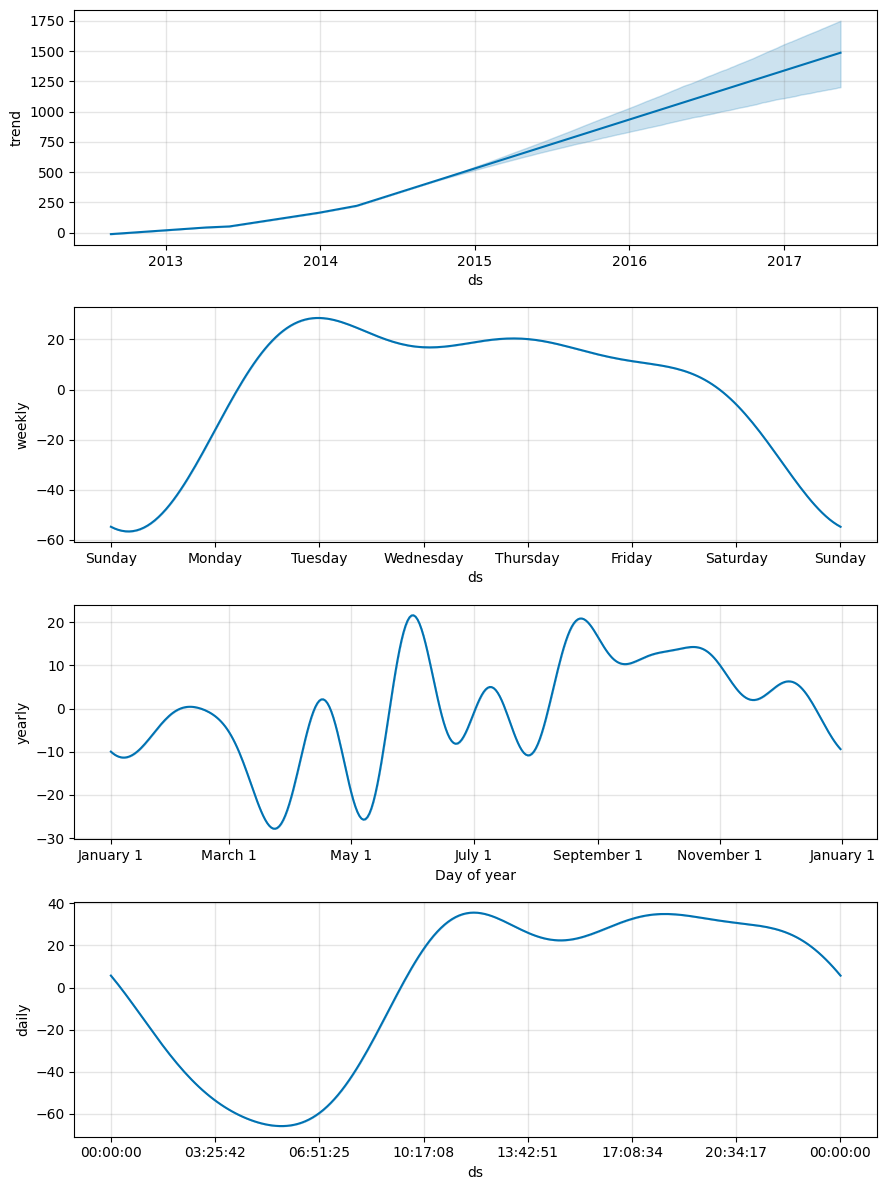

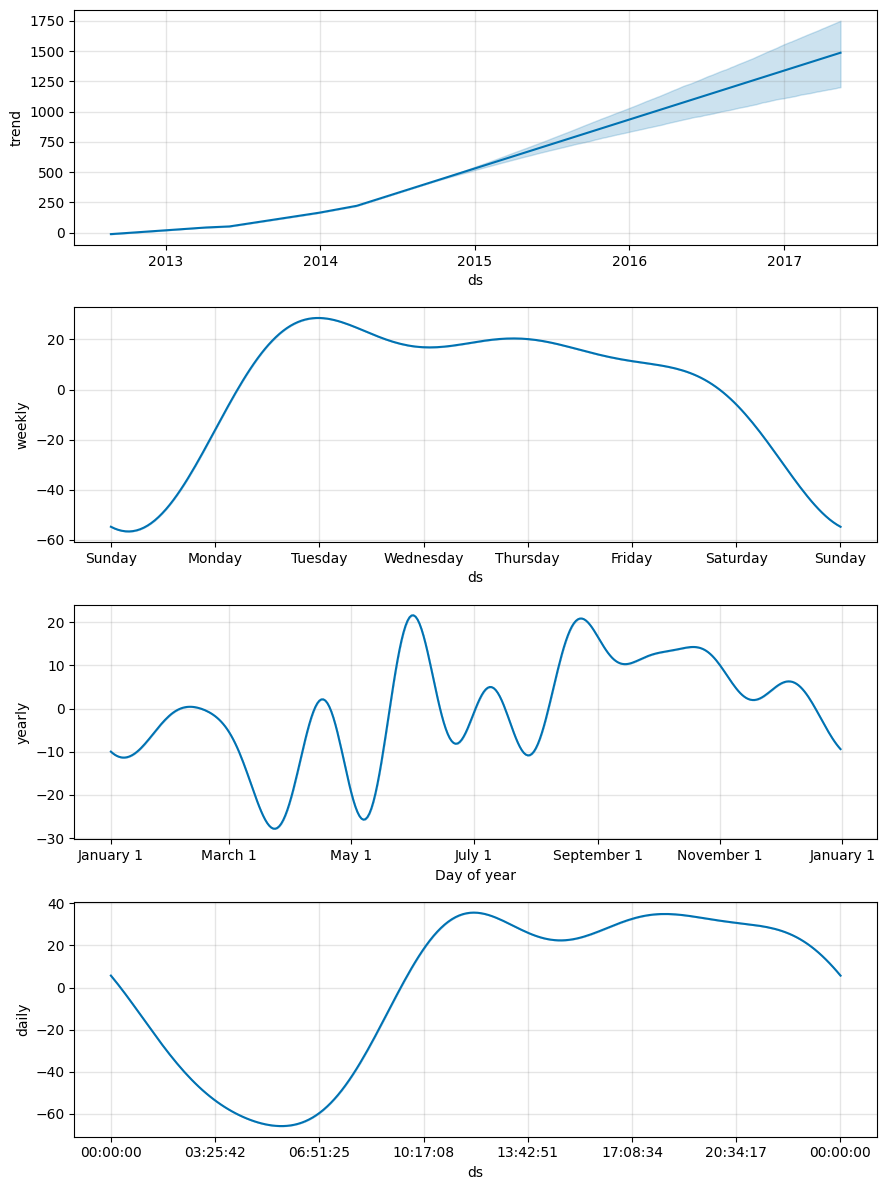

In [91]:
model.plot_components(forecast)

In [92]:
pred = forecast.iloc[-24000:, :]
len(pred)

24000

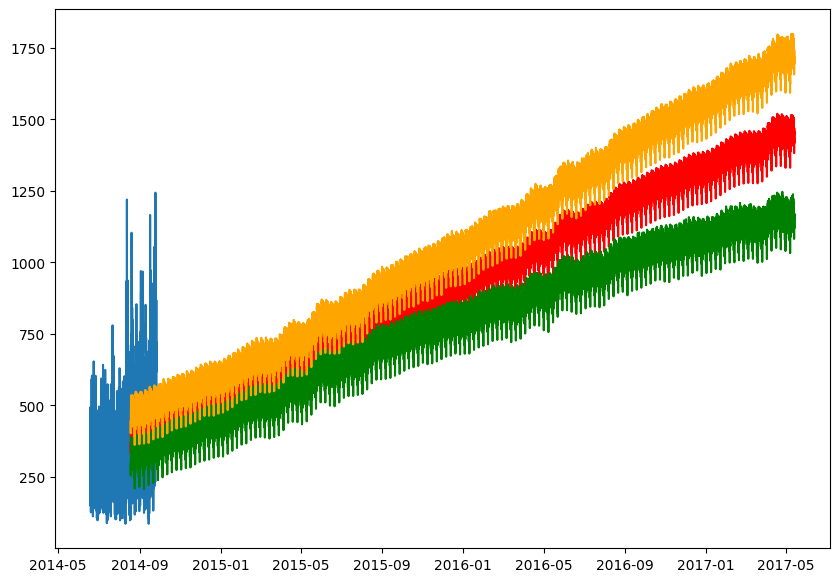

In [93]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

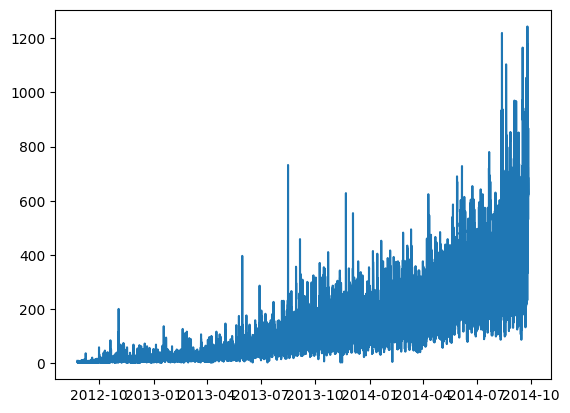

In [94]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

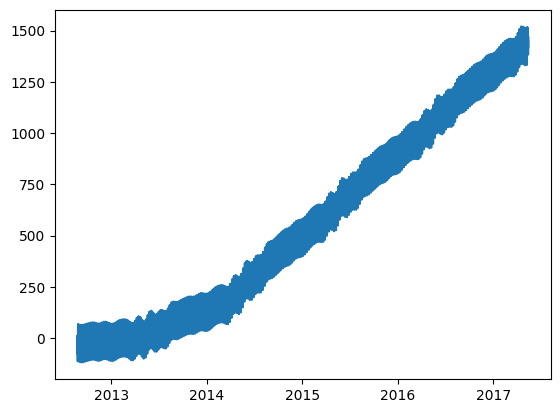

In [95]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

## forecast

In [96]:
def predictCount(date):
    if date>'2017-05-14':
        return "Not predicted yet"
    else:
        var = forecast.loc[forecast['ds']==date,'yhat'].values[0]
        return var.round()
    
predictCount('2017-05-10 00:00:00')

1480.0